# https://marketstack.com/

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import json
import getpass

In [3]:
API_Access_Key=getpass.getpass()

········


In [5]:
root_url='http://api.marketstack.com/v1/'

In [6]:
# http://api.marketstack.com/v1/exchanges
#     ? access_key = YOUR_ACCESS_KEY
params={'access_key':API_Access_Key}

response=requests.get(root_url+'exchanges',params=params)


In [7]:
response.status_code

200

In [8]:
exchanges=response.json()
# exchanges

In [9]:
exchanges['data'][1]

{'name': 'New York Stock Exchange',
 'acronym': 'NYSE',
 'mic': 'XNYS',
 'country': 'USA',
 'country_code': 'US',
 'city': 'New York',
 'website': 'www.nyse.com',
 'timezone': {'timezone': 'America/New_York',
  'abbr': 'EST',
  'abbr_dst': 'EDT'},
 'currency': {'code': 'USD', 'symbol': '$', 'name': 'US Dollar'}}

In [10]:
# for exchange in exchanges['data']:
    

In [11]:
stock_exchange_data=pd.DataFrame(exchanges['data'])

In [12]:
stock_exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          69 non-null     object
 1   acronym       68 non-null     object
 2   mic           69 non-null     object
 3   country       68 non-null     object
 4   country_code  69 non-null     object
 5   city          68 non-null     object
 6   website       69 non-null     object
 7   timezone      68 non-null     object
 8   currency      68 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


In [13]:
stock_exchange_data.describe()

,name,acronym,mic,country,country_code,city,website,timezone,currency
count,69,68,69,68,69,68,69,68,68
unique,69,63,69,49,50,55,52,48,36
top,Belgrade Stock Exchange,Euronext,XCAI,USA,US,New York,www.otcmarkets.com,"{'timezone': 'America/New_York', 'abbr': 'EST'...","{'code': 'EUR', 'symbol': '€', 'name': 'Euro'}"
freq,1,4,1,13,13,11,6,14,16


In [14]:
stock_exchange_data['country'].unique()

array(['USA', 'Argentina', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Iceland', 'India',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Russia',
       'Saudi Arabia', 'Serbia', 'Singapore', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'Vietnam', None], dtype=object)

In [15]:
stock_exchange_data[stock_exchange_data['country']=='India']

,name,acronym,mic,country,country_code,city,website,timezone,currency
24,Bombay Stock Exchange,MSE,XBOM,India,IN,Mumbai,www.bseindia.com,"{'timezone': 'Asia/Kolkata', 'abbr': 'IST', 'a...","{'code': 'INR', 'symbol': 'Rs', 'name': 'India..."
25,National Stock Exchange India,NSE,XNSE,India,IN,Mumbai,www.nseindia.com,"{'timezone': 'Asia/Kolkata', 'abbr': 'IST', 'a...","{'code': 'INR', 'symbol': 'Rs', 'name': 'India..."


In [16]:
root_url

'http://api.marketstack.com/v1/'

In [17]:
# http://api.marketstack.com/v1/eod
#     ? access_key = YOUR_ACCESS_KEY
#     & symbols = AAPL
params={'access_key':API_Access_Key,'symbols':'AAPL'}
response=requests.get(root_url+'eod',params=params)

In [18]:
AAPL_data=response.json()['data']

In [19]:
AAPL_df=pd.DataFrame(AAPL_data)

In [20]:
AAPL_df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
0,118.92,120.9900,118.146,120.30,91183018.0,120.9900,118.146,120.30,118.92,91183018.0,AAPL,XNAS,2020-11-16T00:00:00+0000
1,119.44,119.6717,117.870,119.26,81688586.0,119.6717,117.870,119.26,119.44,81688586.0,AAPL,XNAS,2020-11-13T00:00:00+0000
2,119.62,120.5300,118.570,119.21,103350674.0,120.5300,118.570,119.21,119.62,103350674.0,AAPL,XNAS,2020-11-12T00:00:00+0000
3,117.19,119.6300,116.440,119.49,112294954.0,119.6300,116.440,119.49,117.19,112294954.0,AAPL,XNAS,2020-11-11T00:00:00+0000
4,115.55,117.5900,114.130,115.97,138023390.0,117.5900,114.130,115.97,115.55,138023390.0,AAPL,XNAS,2020-11-10T00:00:00+0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,367.85,370.4700,363.640,364.11,27764470.0,370.4700,363.640,364.11,367.85,27764470.0,AAPL,XNAS,2020-07-02T00:00:00+0000
96,365.12,367.3600,363.910,364.11,27263209.0,367.3600,363.910,364.11,365.12,27263209.0,AAPL,XNAS,2020-07-01T00:00:00+0000
97,360.08,365.9800,360.000,364.80,35055821.0,365.9800,360.000,364.80,360.08,35055821.0,AAPL,XNAS,2020-06-30T00:00:00+0000
98,353.25,362.1736,351.280,361.78,32661519.0,362.1736,351.280,361.78,353.25,32661519.0,AAPL,XNAS,2020-06-29T00:00:00+0000


In [21]:
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        100 non-null    float64
 1   high        100 non-null    float64
 2   low         100 non-null    float64
 3   close       100 non-null    float64
 4   volume      100 non-null    float64
 5   adj_high    100 non-null    float64
 6   adj_low     100 non-null    float64
 7   adj_close   100 non-null    float64
 8   adj_open    100 non-null    float64
 9   adj_volume  100 non-null    float64
 10  symbol      100 non-null    object 
 11  exchange    100 non-null    object 
 12  date        100 non-null    object 
dtypes: float64(10), object(3)
memory usage: 10.3+ KB


In [22]:
AAPL_df['Date']=pd.to_datetime(AAPL_df['date'])

In [23]:
AAPL_df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date,Date
0,118.92,120.9900,118.146,120.30,91183018.0,120.9900,118.146,120.30,118.92,91183018.0,AAPL,XNAS,2020-11-16T00:00:00+0000,2020-11-16 00:00:00+00:00
1,119.44,119.6717,117.870,119.26,81688586.0,119.6717,117.870,119.26,119.44,81688586.0,AAPL,XNAS,2020-11-13T00:00:00+0000,2020-11-13 00:00:00+00:00
2,119.62,120.5300,118.570,119.21,103350674.0,120.5300,118.570,119.21,119.62,103350674.0,AAPL,XNAS,2020-11-12T00:00:00+0000,2020-11-12 00:00:00+00:00
3,117.19,119.6300,116.440,119.49,112294954.0,119.6300,116.440,119.49,117.19,112294954.0,AAPL,XNAS,2020-11-11T00:00:00+0000,2020-11-11 00:00:00+00:00
4,115.55,117.5900,114.130,115.97,138023390.0,117.5900,114.130,115.97,115.55,138023390.0,AAPL,XNAS,2020-11-10T00:00:00+0000,2020-11-10 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,367.85,370.4700,363.640,364.11,27764470.0,370.4700,363.640,364.11,367.85,27764470.0,AAPL,XNAS,2020-07-02T00:00:00+0000,2020-07-02 00:00:00+00:00
96,365.12,367.3600,363.910,364.11,27263209.0,367.3600,363.910,364.11,365.12,27263209.0,AAPL,XNAS,2020-07-01T00:00:00+0000,2020-07-01 00:00:00+00:00
97,360.08,365.9800,360.000,364.80,35055821.0,365.9800,360.000,364.80,360.08,35055821.0,AAPL,XNAS,2020-06-30T00:00:00+0000,2020-06-30 00:00:00+00:00
98,353.25,362.1736,351.280,361.78,32661519.0,362.1736,351.280,361.78,353.25,32661519.0,AAPL,XNAS,2020-06-29T00:00:00+0000,2020-06-29 00:00:00+00:00


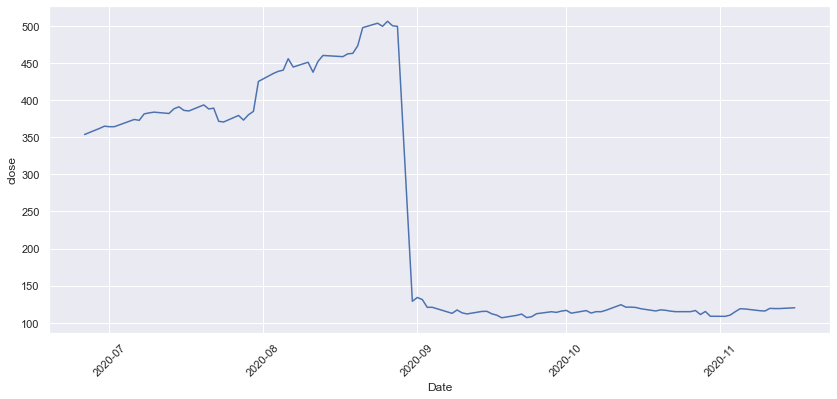

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x='Date',y='close',data=AAPL_df,ax=ax)
plt.xticks(rotation=45)
plt.show()


In [25]:
# sns.lineplot(x='Date',y='close',data=AAPL_df)

In [26]:
params={'access_key':API_Access_Key,'symbols':'RELIANCE.XNSE'}#'search':'infosys'
response=requests.get(root_url+'eod',params=params)

In [27]:
RELIANCE_df=pd.DataFrame(response.json()['data'])

In [28]:
RELIANCE_df.head()

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
0,2014.9,2015.30,1995.35,2002.30,2411900.0,None,None,2002.30,None,None,RELIANCE.XNSE,XNSE,2020-11-14T00:00:00+0000
1,1982.0,2036.65,1981.75,1996.40,20943994.0,None,None,1996.40,None,None,RELIANCE.XNSE,XNSE,2020-11-13T00:00:00+0000
2,1981.0,2008.45,1965.00,1980.00,18481466.0,None,None,1980.00,None,None,RELIANCE.XNSE,XNSE,2020-11-12T00:00:00+0000
3,2089.0,2095.00,1978.10,1997.20,26178477.0,None,None,1997.20,None,None,RELIANCE.XNSE,XNSE,2020-11-11T00:00:00+0000
4,2077.0,2090.00,2041.20,2084.55,17045147.0,None,None,2084.55,None,None,RELIANCE.XNSE,XNSE,2020-11-10T00:00:00+0000


In [29]:
RELIANCE_df['Date']=pd.to_datetime(RELIANCE_df['date'])

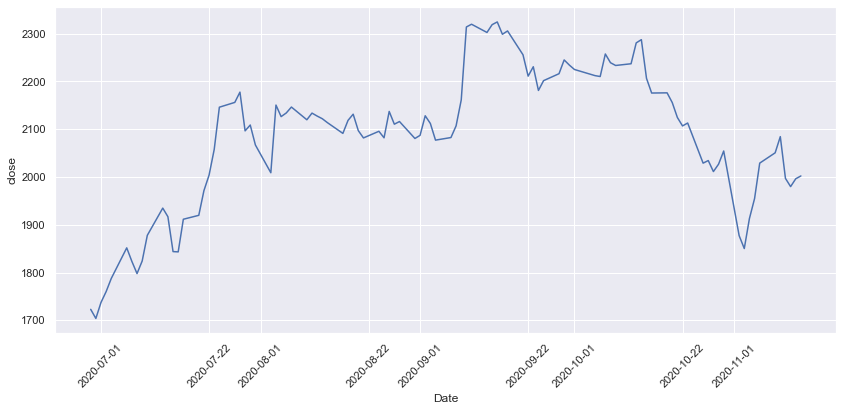

In [30]:
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x='Date',y='close',data=RELIANCE_df,ax=ax)
plt.xticks(rotation=45)
plt.show()